# Parkinson Speech Dataset with Multiple Types of Sound Recordings

##### L'objet du devoir est de mettre en pratique les différentes compétences, nécessaires au métier de data-scientist, vues en cours cette année.


## Packages

In [1]:
import selenium
from selenium import webdriver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

## Push sur Git 

In [263]:
!git add Projet_Python_DataAnalysis.ipynb
!git commit -m "Gradient Boosting"
!git push 


[master 414b606] Gradient Boosting
 1 file changed, 149 insertions(+), 61 deletions(-)
fatal: unable to access 'https://github.com/cjacques4/Parkinson-Speech-Dataset-with-Multiple-Types-of-Sound-Recordings.git/': Could not resolve host: github.com


# 1. Téléchargement de la base de données via WebScrapping

In [ ]:
driver = webdriver.Chrome(executable_path="./chromedriver")

url = "https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings#"
driver.get(url)

In [ ]:
# Télécharger le dataset
driver.find_element_by_link_text('Data Folder').click()
xpath = '/html/body/table/tbody/tr[4]/td[2]/a'
driver.find_element_by_xpath(xpath).click()

# 2. Data Visualisation (matplotlib)

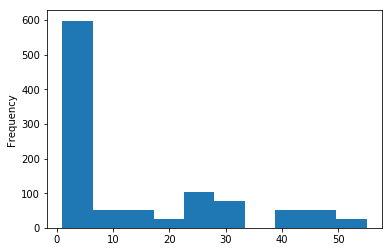

In [41]:
df.UPDRS.plot.hist()

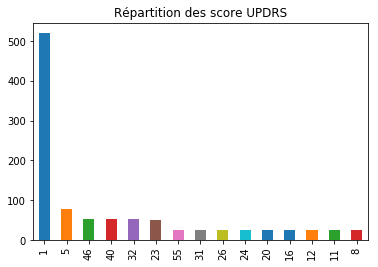

In [40]:
title = "Répartition des score UPDRS"
to_plot = df.UPDRS.value_counts(dropna=False)
to_plot.plot.bar(title=title)

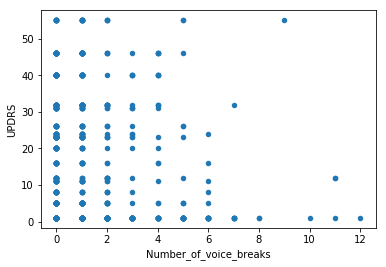

In [38]:
df.plot.scatter("Number_of_voice_breaks", "UPDRS")

# 3. Data Préparation (pandas)

## Importer la base de données

Les fichiers téléchargés étaient en .txt, nous avons alors utilisé la fonction read_csv afin de pouvoir les traiter comme des fichiers csv,et nous avons ajouter un header avec le nom de chaque colonnes : 

In [241]:
# Nous allons utilisé df comme base d'apprentissage 
# et nous utiliserons df_val comme jeu de validation final 

df = pd.read_csv ('train_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks',
                               'UPDRS', 
                               'class_information']) 
  


df_val = pd.read_csv ('test_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks', 
                               'class_information']) 





##  Pré-traitement

In [40]:
df.head().T

id,1,1,1,1,1
Jitter_local,0.728000,1.220000,2.502000,3.509000,2.470000
Jitter_local_absolute,0.000038,0.000074,0.000123,0.000167,0.000126
Jitter_rap,0.353000,0.732000,1.156000,1.715000,1.358000
Jitter_ppq5,0.376000,0.670000,1.634000,1.539000,1.341000
Jitter_ddp,1.059000,2.196000,3.469000,5.145000,4.075000
Shimmer_local,5.864000,8.719000,13.513000,9.112000,10.696000
Shimmer_local_dB,0.642000,0.875000,1.273000,1.040000,1.256000
Shimmer_apq3,2.058000,4.347000,5.263000,3.102000,5.262000
Shimmer_apq5,3.180000,5.166000,8.771000,4.927000,7.076000
Shimmer_apq11,7.194000,7.548000,16.779000,12.823000,9.199000


In [176]:
df_val.head()

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Minimum_pitch,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,class_information
id,,,,,,,,,,,,,,,,,,,,,
1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1
1,0.208,0.000009,0.077,0.095,0.230,1.241,0.109,0.487,0.715,1.568,...,218.455,243.523,221.0,220.0,0.004416,0.000120,0.0,0.0,0.0,1


In [9]:
df.shape

(1039, 28)

In [10]:
df_val.shape

(167, 27)

In [11]:
df.dtypes

Jitter_local                           float64
Jitter_local_absolute                  float64
Jitter_rap                             float64
Jitter_ppq5                            float64
Jitter_ddp                             float64
Shimmer_local                          float64
Shimmer_local_dB                       float64
Shimmer_apq3                           float64
Shimmer_apq5                           float64
Shimmer_apq11                          float64
Shimmer_dda                            float64
AC                                     float64
NTH                                    float64
HTN                                    float64
Median_pitch                           float64
Mean_pitch                             float64
Standard_deviation                     float64
Minimum_pitch                          float64
Maximum_pitch                          float64
Number_of_pulses                         int64
Number_of_periods                        int64
Mean_period  

In [12]:
#Check NA train
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Jitter_local                           0
Jitter_local_absolute                  0
Jitter_rap                             0
Jitter_ppq5                            0
Jitter_ddp                             0
Shimmer_local                          0
Shimmer_local_dB                       0
Shimmer_apq3                           0
Shimmer_apq5                           0
Shimmer_apq11                          0
Shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_deviation                     0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_locally

### Visualisation des NA

Ici nous avons de la chance car notre base de données est très propre, elle ne contient aucune valeur nulle. 

In [13]:
#Check NA test
null_counts = df_val.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Jitter_local                           0
Jitter_local_absolute                  0
Jitter_rap                             0
Jitter_ppq5                            0
Jitter_ddp                             0
Shimmer_local                          0
Shimmer_local_dB                       0
Shimmer_apq3                           0
Shimmer_apq5                           0
Shimmer_apq11                          0
Shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_deviation                     0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_locally

In [42]:
#test = df_val.head()
#test.iloc[0][0]

# 4. Modélisation (scikit learn)

In [242]:
#Read data 
target = df.UPDRS
df.drop(['UPDRS'], axis='columns', inplace=True)
X = df


## Séparer le jeu de données en train et test avec une cross validation

In [244]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33)

### Standardiser les valeurs

In [245]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Choix d'un algorithme d'apprentissage

### Support Vector Machine (SVM)

Dans un premier temps, nous allons lancer un svm avec les paramètres par défaut puis nous allons aller au-delà de ces paramètres à l’aide d’un Grid Search :

In [246]:
from sklearn import svm
algorithme = svm.SVC()
algorithme.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [247]:
from sklearn import cross_validation
cross_validation.cross_val_score(algorithme, X, target, n_jobs=-1)

array([0.49431818, 0.49712644, 0.51032448])

### Aller au delà des paramètres par défaut :

In [265]:
from sklearn import grid_search
parameters = {  'gamma' : [0.1,0.01, 0.001, 0.0001],
                'C'      : [100,1000, 10000],
                "probability" : [True],
                'kernel' : ['rbf', 'poly', 'sigmoid','linear'],
                "degree" : [1,3,5]}

grid_svm       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)

grid_svm.fit(X_train, y_train)

print (grid_svm.best_score_, grid_svm.best_estimator_)



0.75 SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Random Forest

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

algorithme2 = RandomForestClassifier() 


parameters = {  "n_estimators"         : [ 10, 100, 1000 ], 
                "min_samples_leaf"     : [  3,   1,   7 ],
                "criterion"            : ["gini", "entropy"] }

grid_rf       = grid_search.GridSearchCV(algorithme2, parameters, n_jobs=-1)

grid_rf.fit(X_train, y_train)

print (grid_rf.best_score_, grid_rf.best_estimator_)




0.7701149425287356 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Gradient Boosting 

In [260]:
from sklearn.ensemble import GradientBoostingClassifier


algorithme3 = GradientBoostingClassifier()
algorithme3.get_params()


parameters = {'n_estimators': [10,100,200]                 ,
                  'max_depth': None                        ,
                  'min_samples_split': [2,7,3]             ,
                  'learning_rate': [0.01,0.1, 0,2]              ,
                  'loss': 'ls'                             }



grid_gb     = grid_search.GridSearchCV(algorithme3, {})

grid_gb.fit(X_train, y_train)

print (grid_gb.best_score_, grid_gb.best_estimator_)
    
    
    


0.728448275862069 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


# 5. Visualisation des performances

# Tester tous les algos

In [162]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in sklearn.__dict__['__all__']:    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [163]:
algos = get_sklearn_algorithms(True)
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))

['_ASSUME_FINITE', '__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_contextmanager', '_isotonic', 'base', 'calibration', 'clone', 'cluster', 'config_context', 'covariance', 'cross_decomposition', 'cross_validation', 'datasets', 'decomposition', 'discriminant_analysis', 'dummy', 'ensemble', 'exceptions', 'externals', 'feature_extraction', 'feature_selection', 'gaussian_process', 'get_config', 'grid_search', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'learning_curve', 'linear_model', 'logger', 'logging', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'os', 'pipeline', 'preprocessing', 'random_projection', 're', 'semi_supervised', 'set_config', 'setup_module', 'svm', 'sys', 'tree', 'utils', 'warnings']
calibration
 nom algorithme  =  CalibratedClassifierCV
 nom algori

In [164]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [165]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print("="*30)

Probability calibration w
0.7026239067055393
Isotonic regression model
X should be a 1d array
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode labels with value
fit() takes 2 positional arguments but 3 were give
Linear Support Vector Cla
0.7288629737609329
__init__() missing 1 required positional argument:
Sigmoid regression model.
bad input shape (696, 27)
Perform Affinity Propagat
'AffinityPropagation' object has no attribute 'sco
Agglomerative Cluste
'AgglomerativeClustering' object has no attribute 
Implements the Birch clus
'Birch' object has no attribute 'score'
Perform DBSCAN clustering
'DBSCAN' object has no attribute 'score'
Agglomerate features.
'FeatureAgglomeration' object has no attribute 'sc
K-Means clustering

    R
-4306.402705527668
Mean shift clustering usi


/anaconda3/lib/python3.7/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


'MeanShift' object has no attribute 'score'
Mini-Batch K-Means cluste
-4976.808887556496
Spectral biclustering (Kl
'SpectralBiclustering' object has no attribute 'sc
Apply clustering to a pro
'SpectralClustering' object has no attribute 'scor
Spectral Co-Clustering al
'SpectralCoclustering' object has no attribute 'sc
An object for detecting o


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.4839650145772595
Maximum likelihood covari
-0.9545813799915805
Sparse inverse covariance


/anaconda3/lib/python3.7/site-packages/sklearn/covariance/graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: 2.886e-02
  ConvergenceWarning)


-15.241306656070776
Sparse inverse covariance
-25.393371853695346
LedoitWolf Estimator
-16.48926289168314
Minimum Covariance Determ
-205.90612182140575
Oracle Approximating Shri
-14.972224706335503
Covariance estimator with
-20.88143043088543
CCA Canonical Correlation
-0.001286715555245399
PLSCanonical implements
-0.45495998253826797
PLS regression

    PLSRe
0.5270065539045051
Partial Least Square SVD
'PLSSVD' object has no attribute 'score'
Dictionary learning


/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


'DictionaryLearning' object has no attribute 'scor
Factor Analysis (FA)
-25.15264218793281
FastICA
'FastICA' object has no attribute 'score'
Incremental principal com
'IncrementalPCA' object has no attribute 'score'
Kernel Principal componen
'KernelPCA' object has no attribute 'score'
Latent Dirichlet Allocati
Negative values in data passed to LatentDirichletA
Mini-batch dictionary lea
'MiniBatchDictionaryLearning' object has no attrib
Mini-batch Sparse Princip
'MiniBatchSparsePCA' object has no attribute 'scor
Non-Negative Matrix Facto
Negative values in data passed to NMF (input X)
Principal component analy
-0.9526764203101222
Principal component analy
'RandomizedPCA' object has no attribute 'score'
__init__() missing 1 required positional argument:
Sparse Principal Componen
'SparsePCA' object has no attribute 'score'
Dimensionality reduction
'TruncatedSVD' object has no attribute 'score'
DummyClassifier is a
0.2944606413994169
DummyRegressor is a
-0.0030765349683525844
An AdaBoost c

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'IsolationForest' object has no attribute 'score'
A random forest classifie
0.7434402332361516
A random forest regressor
0.6206671393661058
An ensemble of totally ra
'RandomTreesEmbedding' object has no attribute 'sc
__init__() missing 1 required positional argument:
Transforms lists of featu
'numpy.ndarray' object has no attribute 'items'
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Univariate feature select
'GenericUnivariateSelect' object has no attribute 
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Filter
'SelectFdr' object has no attribute 'score'
Filter
'SelectFpr' object has no attribute 'score'
__init__() missing 1 required positional argument:
Filter
'SelectFwe' object has no attribute 'score'
Select features according
'SelectKBest' object has no attribute 'score'
Select features according
'SelectPercentile' object has no attribute 'score'
Feature selector that rem
'VarianceThreshold' object

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/

'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
'RandomizedLogisticRegression' object has no attri
Linear least squares with
0.6087943078775404
Ridge regression with bui
0.6100474413864077
Classifier using Ridge re
0.6822157434402333
Ridge classifier with bui
0.6705539358600583
Linear classifiers (SVM,
0.6239067055393586
Linear model fitted by mi
0.6042850359368211
Theil-Sen Estimator


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5567322522728366
Isomap Embedding

    Non
'Isomap' object has no attribute 'score'
Locally Linear Embedding
'LocallyLinearEmbedding' object has no attribute '
Multidimensional scaling
'MDS' object has no attribute 'score'
Spectral embedding for no
'SpectralEmbedding' object has no attribute 'score
t-distributed Stochastic
'TSNE' object has no attribute 'score'
Variational Bayesian esti
-4.584110473196322
Dirichlet Process Gaussia
[ -45.1560494   -46.65532575  -45.86153132  -46.37262343  -44.87374997
  -55.77267537  -44.99242489  -54.48631316  -45.89695277  -47.79775326
  -52.06056204  -47.99871352  -51.61526926  -51.00127055  -46.02090238
  -48.39053815  -48.81020034  -45.58832808  -56.90936268  -48.81768333
  -46.82328181  -46.72747666  -47.16679082  -45.66418132  -45.19591442
  -45.99053083  -45.93658936  -46.66915441  -59.14876375  -47.03490032
  -58.20093607  -46.44204112  -46.50509321  -49.02026862  -50.93639397
  -45.92424961  -46.05611291  -45.96018897  -55.24183509  -47.6779

/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (27 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Algo de classification
Regression based on neigh
Input contains NaN, infinity or a value too large 
Bernoulli Restricted Bolt
'BernoulliRBM' object has no attribute 'score'
Multi-layer Perceptron cl


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7667638483965015
Multi-layer Perceptron re
0.6089741634555329
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Imputation transformer fo
'Imputer' object has no attribute 'score'
Center a kernel matrix
'KernelCenterer' object has no attribute 'score'
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode labels with value
fit() takes 2 positional arguments but 3 were give
Scale each feature by its
'MaxAbsScaler' object has no attribute 'score'
Transforms features by sc
'MinMaxScaler' object has no attribute 'score'
Transform between iterabl
fit() takes 2 positional arguments but 3 were give
Normalize samples individ
'Normalizer' object has no attribute 'score'
Encode categorical intege
X needs to contain only non-negative integers.
Generate polynomial and i
'P

/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.7259475218658892
Linear Support Vector Reg
0.5927854119487749
Nu-Support Vector Classif
specified nu is infeasible
Nu Support Vector Regress
0.3127662804521394
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
0.6880466472303207
Epsilon-Support Vector Re
0.3229568483201146
'module' object is not callable
A decision tree classifie
0.7405247813411079
A decision tree regressor
0.48130736673828484
An extremely randomized t
0.6676384839650146
An extremely randomized t
0.3485614929379224
Linear Discriminant Analy
0.60932944606414
Quadratic Discriminant An
0.685131195335277
Standardize features by r
'StandardScaler' object has no attribute 'score'


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [166]:
best_algorithm

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [167]:
performances

{'Probability calibration w': [0.7026239067055393],
 'Linear Support Vector Cla': [0.7259475218658892],
 'An object for detecting o': [0.4839650145772595],
 'PLS regression\n\n    PLSRe': [0.5270065539045051],
 'DummyClassifier is a': [0.2944606413994169],
 'An AdaBoost classifier.': [0.6384839650145773],
 'An AdaBoost regressor.': [0.6104977834563081],
 'A Bagging classifier.': [0.7696793002915452],
 'A Bagging regressor.': [0.6214315237047534],
 'An extra-trees classifier': [0.7551020408163265],
 'An extra-trees regressor.': [0.6560819399446576],
 'Gradient Boosting for cla': [0.7813411078717201],
 'Gradient Boosting for reg': [0.6609979529303174],
 'A random forest classifie': [0.7434402332361516],
 'A random forest regressor': [0.6206671393661058],
 'The legacy Gaussian Proce': [0.436940933291642],
 'Gaussian process classifi': [0.7288629737609329],
 'Gaussian process regressi': [0.07147842153441275],
 'Bayesian ARD regression.': [0.6137364117474575],
 'Bayesian ridge regression': 

In [168]:
import pandas as pd
df_performances = pd.DataFrame(performances).T

col_name = "performance"
df_performances.columns = [col_name]

df_performances = df_performances.sort_values(col_name)

In [169]:
df_performances

,performance
Gaussian process regressi,0.071478
DummyClassifier is a,0.294461
Nu Support Vector Regress,0.312766
Nearest centroid classifi,0.317784
Epsilon-Support Vector Re,0.322957
An extremely randomized t,0.348561
Passive Aggressive Regres,0.422001
The legacy Gaussian Proce,0.436941
A decision tree regressor,0.481307
An object for detecting o,0.483965


In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

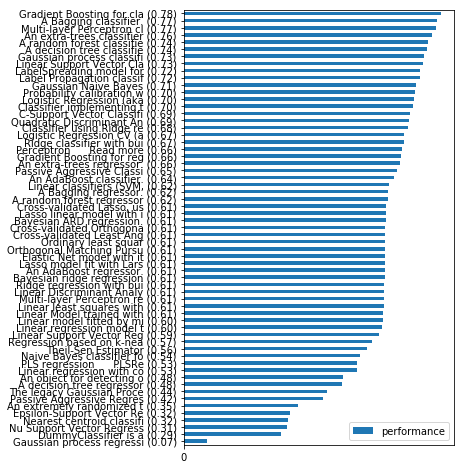

In [171]:
new_labels = []
for i, index in enumerate(df_performances.index):
    new_label = "%s (%.2f)"%(index,df_performances.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df_performances.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df_performances.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass